# ***Business Understanding***
- In this dataset we have to predict the class of the mushrooms as per given variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# ***Data Understanding***

### ***Variables Details***

1. ***Cap Shape***: The shape of the mushroom's cap (e.g., bell, conical, convex).
2. **Cap Surface***: The surface texture of the mushroom's cap (e.g., fibrous, grooves, smooth).
3. ***Cap Color***: The color of the mushroom's cap (e.g., brown, yellow, red).
4. ***Bruises***: Whether the mushroom has bruises or not (bruises are often an important feature in mushroom identification).
5. ***Odor***: The odor of the mushroom (e.g., almond, anise, none).
6. ***Gill Attachment***: How the gills are attached to the stem (e.g., free, attached).
7. ***Gill Spacing***: The spacing between gills (e.g., close, crowded).
8. ***Gill Size***: The size of the mushroom's gills (e.g., broad, narrow).
9. ***Gill Color***: The color of the mushroom's gills (e.g., black, brown, pink).
10. ***Stalk Shape***: The shape of the mushroom's stalk (e.g., enlarging, tapering).
11. ***Stalk Root***: The root type of the mushroom's stalk (e.g., bulbous, equal, club).
12. ***Stalk Surface Above Ring***: The surface texture of the mushroom's stalk above the ring (e.g., fibrous, smooth).
13. ***Stalk Surface Below Ring***: The surface texture of the mushroom's stalk below the ring (e.g., fibrous, smooth).
14. ***Stalk Color Above Ring***: The color of the mushroom's stalk above the ring (e.g., white, pink, brown).
15. ***Stalk Color Below Ring***: The color of the mushroom's stalk below the ring (e.g., white, pink, brown).
16. ***Veil Type***: The type of veil covering the gills (usually partial or universal).
17. ***Veil Color***: The color of the veil covering the gills (e.g., white, brown).
18. ***Ring Number***: The number of rings on the mushroom's stalk (e.g., none, one, two).
19. ***Ring Type***: The type of ring on the mushroom's stalk (e.g., pendant, evanescent).
20. ***Spore Print Color***: The color of the mushroom's spore print (e.g., black, brown).
21. ***Population***: The population density of the mushroom (e.g., several, solitary).
22. ***Habitat***: The habitat where the mushroom is typically found (e.g., grasses, leaves, woods).
23. ***Class***: It indicates whether the mushroom is edible (e) or poisonous (p).

In [3]:
df.shape

(8124, 23)

In [4]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# ***Data Preprocessing***

### **Data Cleaning**

In [9]:
# There isn't any null or missing values to treat.

### **EDA**

In [10]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [11]:
list_of_variable = ['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

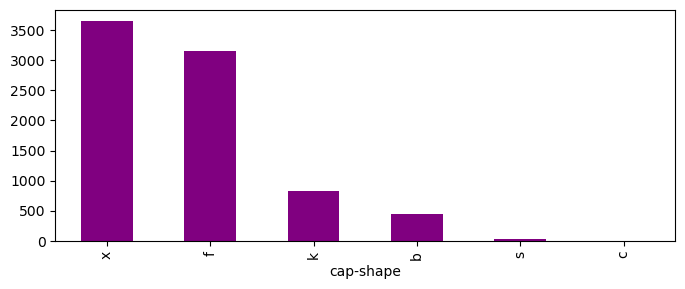

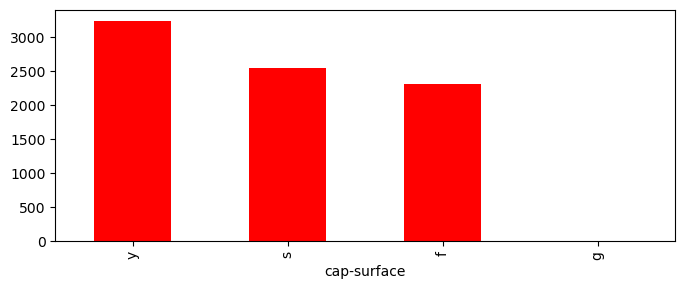

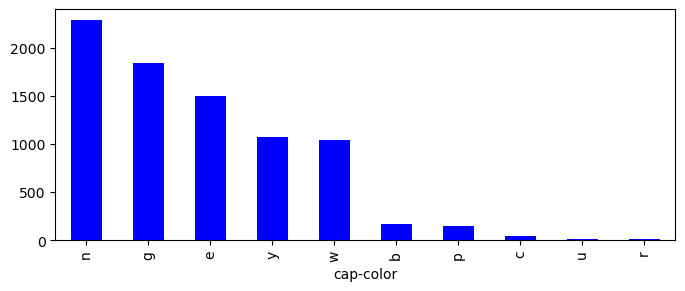

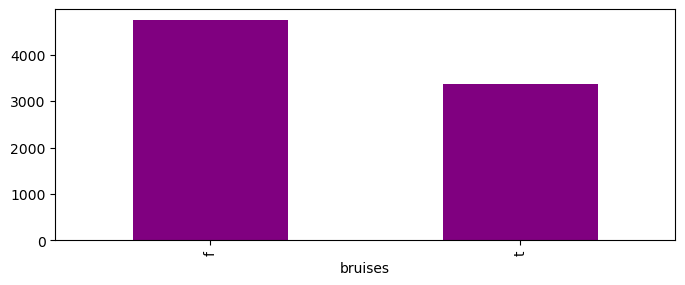

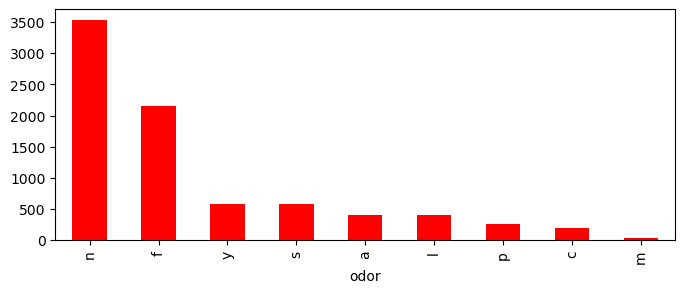

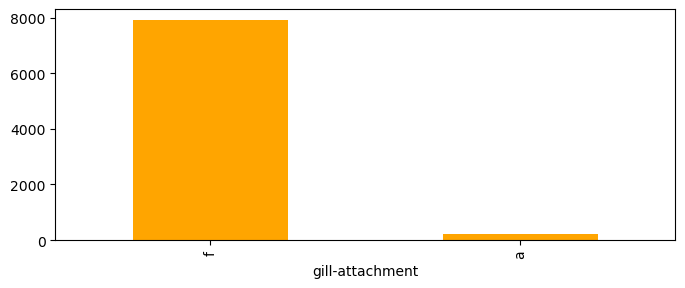

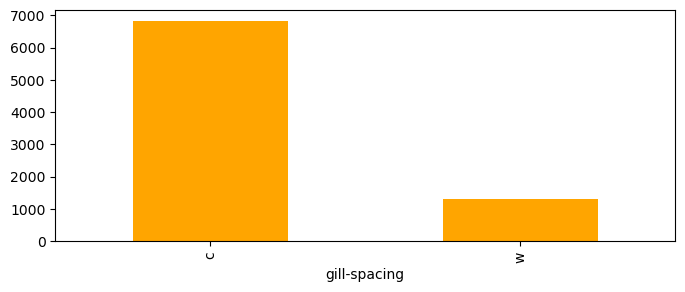

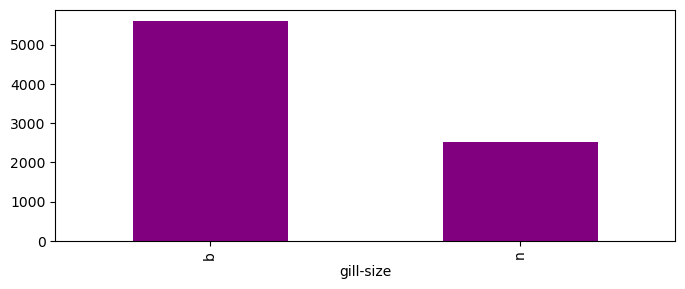

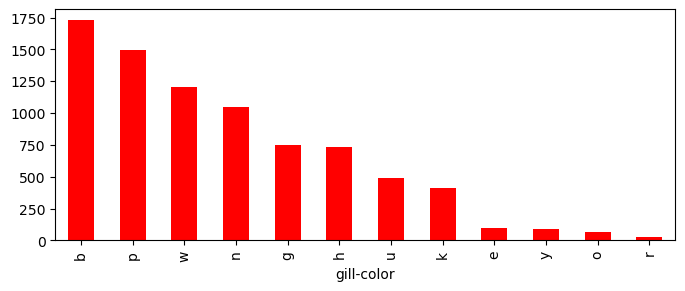

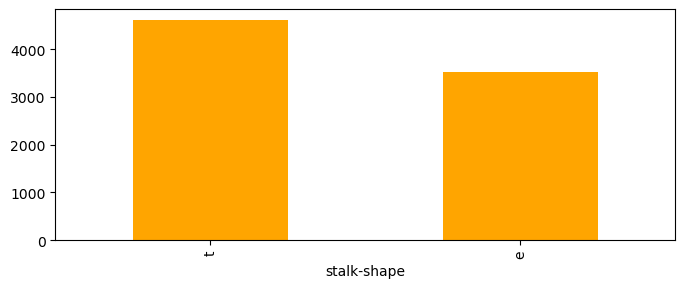

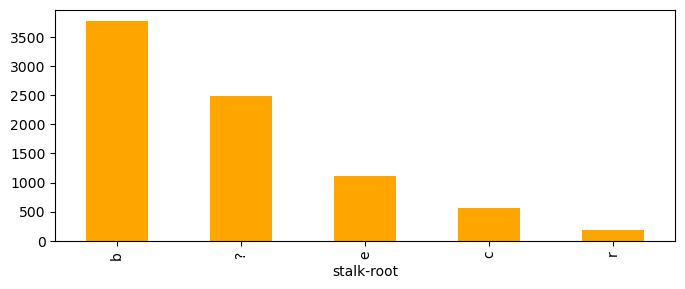

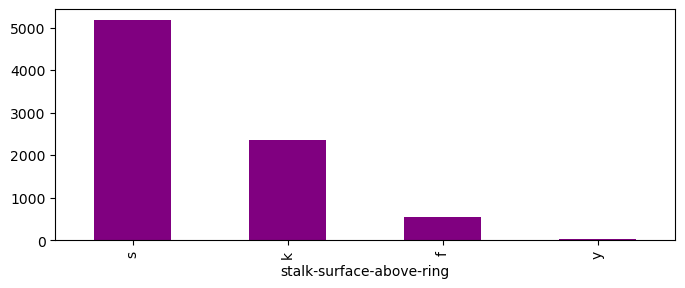

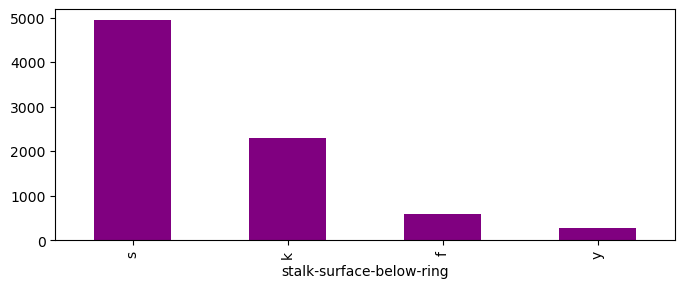

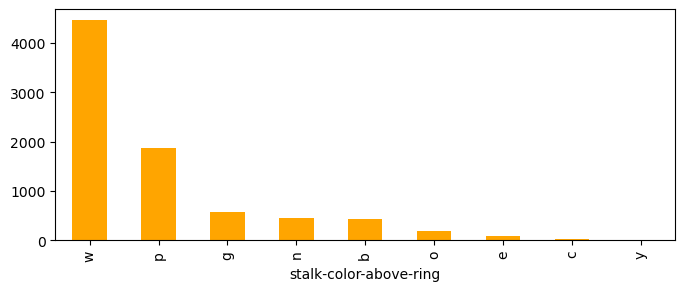

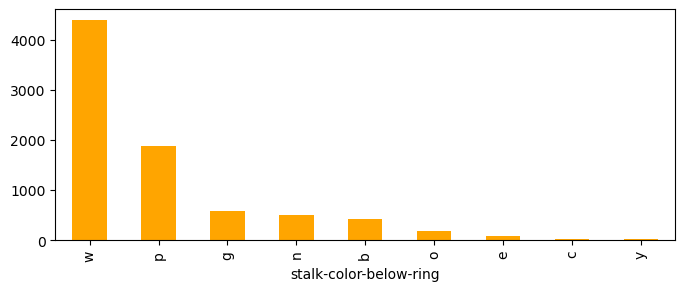

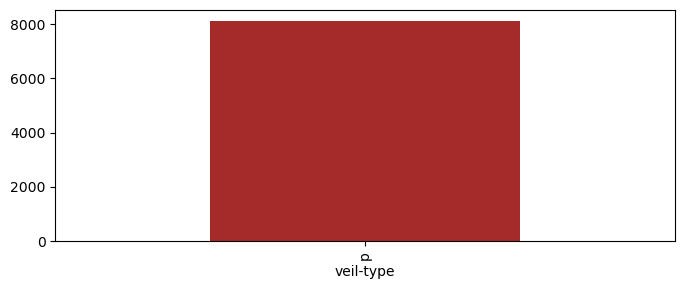

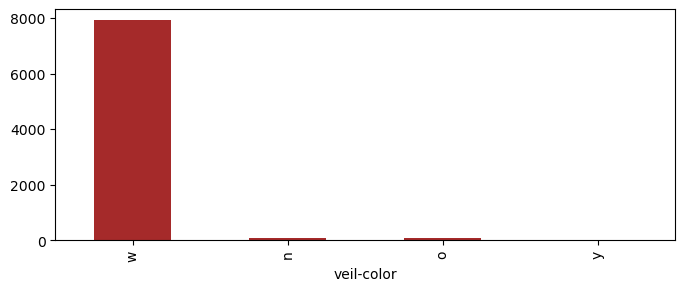

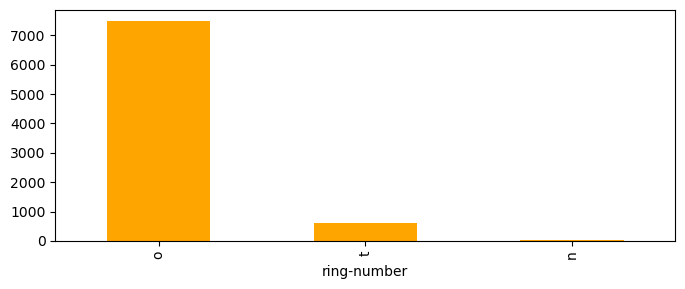

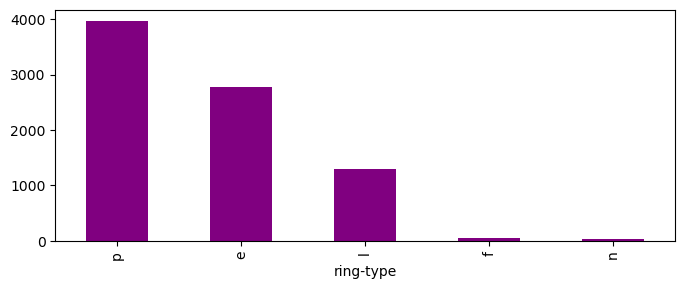

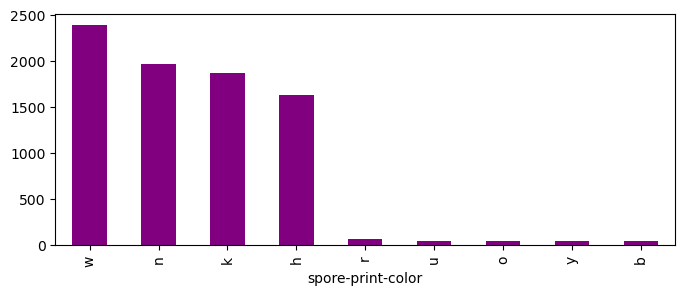

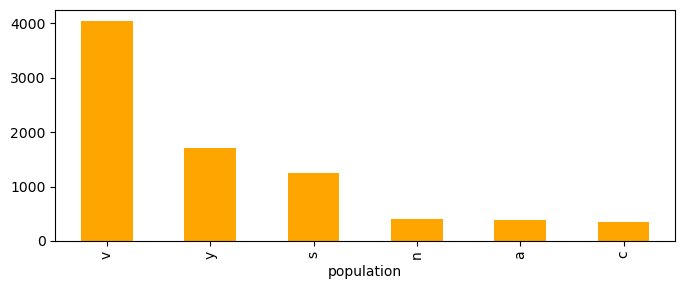

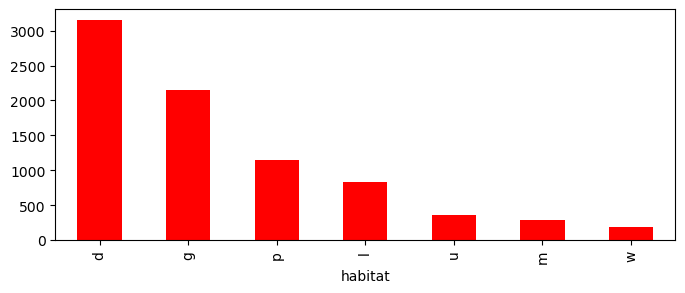

In [12]:
import random
colors = ["red", "brown", "purple", "blue", "orange"]
for i in list_of_variable:
    no = random.randint(0, 4)
    plt.figure(figsize = (8, 3))
    df[i].value_counts().plot(kind = "bar", color = colors[no])
    plt.show()

In [13]:
for i in list_of_variable:
    print(pd.DataFrame(pd.crosstab(df["class"], df[i], margins = True)))
    print("_____________________________________________________________________")

cap-shape    b  c     f    k   s     x   All
class                                       
e          404  0  1596  228  32  1948  4208
p           48  4  1556  600   0  1708  3916
All        452  4  3152  828  32  3656  8124
_____________________________________________________________________
cap-surface     f  g     s     y   All
class                                 
e            1560  0  1144  1504  4208
p             760  4  1412  1740  3916
All          2320  4  2556  3244  8124
_____________________________________________________________________
cap-color    b   c     e     g     n    p   r   u     w     y   All
class                                                              
e           48  32   624  1032  1264   56  16  16   720   400  4208
p          120  12   876   808  1020   88   0   0   320   672  3916
All        168  44  1500  1840  2284  144  16  16  1040  1072  8124
_____________________________________________________________________
bruises     f     t   All
clas

***What datapoints represents by columns ?***

1. *Cap Shape*: 
   - bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

2. *Cap Surface*: 
   - fibrous=f, grooves=g, scaly=y, smooth=s

3. *Cap Color*: 
   - brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

4. *Bruises*: 
   - bruises=t, no bruises=f

5. *Odor*: 
   - almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

6. *Gill Attachment*: 
   - attached=a, descending=d, free=f, notched=n

7. *Gill Spacing*:
    - close=c, crowded=w, distant=d

9. *Gill Size*: 
   - broad=b, narrow=n

10. *Gill Color*: 
   - black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

11. *Stalk Shape*: 
    - enlarging=e, tapering=t

12. *Stalk Root*: 
    - bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r

13. *Stalk Surface Above Ring*: 
    - fibrous=f, scaly=y, silky=k, smooth=s

14. *Stalk Surface Below Ring*: 
    - fibrous=f, scaly=y, silky=k, smooth=s

15. *Stalk Color Above Ring*: 
    - brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

16. *Stalk Color Below Ring*: 
    - brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

17. *Veil Type*: 
    - partial=p, universal=u

18. *Veil Color*: 
    - brown=n, orange=o, white=w, yellow=y

19. *Ring Number*: 
    - none=n, one=o, two=t

20. *Ring Type*: 
    - cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

21. *Spore Print Color*: 
    - black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

22. *Population*: 
    - abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

23. *Habitat*: 
    - grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d


In [14]:
X = df.drop("class", axis = 1)
y = df["class"]

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error

In [16]:
list_to_encode = X.iloc[:,0:].columns.to_list()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
step = ColumnTransformer(transformers = [
    ("col_tnf", OneHotEncoder(sparse = False, drop = "first"), list_to_encode )
], remainder = "passthrough")

pipe = Pipeline([
    ("step", step),
    ("model", LogisticRegression())
])

pipe.fit(X_train, y_train)
pred_train = pipe.predict(X_train)
pred_test = pipe.predict(X_test)

print("Training Accuracy :",pipe.score(X_train, y_train))
print("Testing Accuracy :", pipe.score(X_test, y_test))
print("Cross Validation Score :", cross_val_score(pipe, X_train, y_train, cv = 5).mean())

Training Accuracy : 1.0
Testing Accuracy : 1.0
Cross Validation Score : 0.9996921892580091


In [19]:
confusion_matrix(y_test, pred_test)

array([[852,   0],
       [  0, 773]], dtype=int64)

In [20]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       852
           p       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# ***Save the Model***

In [24]:
new_data = df.drop("class", axis = 1).head()

In [25]:
pipe.predict(new_data)

array(['p', 'e', 'e', 'p', 'e'], dtype=object)

In [28]:
import pickle
with open("mushroom_logistic_model.pkl", "wb") as f:
    pickle.dump(pipe, f)

- The model is predicting with 100% accuracy.